In [1]:
import numpy as np
import random
import os
import pickle

import sys
sys.path.insert(0, '../')
from definitions import *


import copy
import matplotlib.pyplot as plt

In [27]:
weekly_data=load_pickle(DATA_interim+'participants_class_weekly_general.pkl')

In [28]:
def classes_save(col):
    ids=[[] for i in range(3)]
    
    for par in col:
        ids[par.diagnosis].append(par.idNumber)
    
    save_pickle(ids,DATA_interim+'ids_for_classes.pkl')
    

In [29]:
classes_save(weekly_data)

In [30]:
def data_to_hist(collection, minlen=20,class_=None):



        vectors=[[] for i in [0,1]]
        
        
        collections1 =buildData(collection, minlen=minlen,class_=class_)
   
        
        for par in collections1:            

            
            
            for j in range(len(vectors)):

        
                vector = np.zeros(3)
            
                len_par=len(par.data[j])

                for i in range(len_par):
                    
                    if j==0:
 
                        vector[asrm_cutoff(par.data[j][i])] += 1

   
                    elif j==1:
            
                        vector[qids_cutoff(par.data[j][i])] += 1
                        
                    if qids_cutoff(par.data[j][i])>1:
                            print(j,par.idNumber)  

                vector /= float(len_par)
                
            
                vectors[j].append(vector)
        
        
        
        return vectors

### New in DEC

In [31]:
def scores_to_hist(collection, class_=None,trun=False):

        collections1 =copy.deepcopy(collection)
        
        if trun:
            altman=np.zeros(3,dtype="int")
        
            qids=np.zeros(3,dtype="int") 
            
            eq5d=np.zeros(3,dtype="int")
            
            gad7=np.zeros(3,dtype="int")
            
            for par in collections1:            

                if par.diagnosis==class_:
            
                    for j in range(len(par.data[0])):
                        altman[asrm_cutoff(par.data[0][j])]+=1
#                     if asrm_cutoff(par.data[0][j])==0:
#                             print("ALTMAN",par.idNumber) 
                    for i in range(len(par.data[1])):
                       qids[qids_cutoff(par.data[1][i])]+=1
#                     if asrm_cutoff(par.data[0][j])==0:
#                             print("QIDS",par.idNumber)
            
                    for i in range(len(par.data[2])):
                        eq5d[eq5d_cutoff(par.data[2][i])]+=1   
                
                    for i in range(len(par.data[3])):
                        gad7[gad7_cutoff(par.data[3][i])]+=1 
            
        else:
            altman=np.zeros(23,dtype="int")
        
            qids=np.zeros(29,dtype="int")
        

            eq5d=np.zeros(102,dtype="int")
            
            gad7=np.zeros(23,dtype="int")
        
            for par in collections1:            

                if par.diagnosis==class_:
                    for j in range(len(par.data[0])):
        
                        if par.data[0][j]>=0:
                            altman[par.data[0][j]+1]+=1

                        else:
                            altman[0]+=1
            
                    for i in range(len(par.data[1])):
        
                        if par.data[1][i]>=0:
                            qids[par.data[1][i]+1]+=1                    
                        else:
                            qids[0]+=1        

                    for i in range(len(par.data[2])):
        
                        if par.data[2][i]>=0:
                            eq5d[par.data[2][i]+1]+=1                    
                        else:
                            eq5d[0]+=1      
                    for i in range(len(par.data[-1])):
        
                        if par.data[-1][i]>=0:
                            gad7[par.data[1][i]+1]+=1                    
                        else:
                            gad7[0]+=1      
        
        return altman,qids,eq5d,gad7

In [32]:
def asrm_cutoff(a):
        if a<0:
            return int(0)
        elif a>5:
            return int(2)
        else:
            return int(1)
        
def qids_cutoff(a):
        if a<0:
            return int(0)
        elif a>10:
            return int(2)
        else:
            return int(1)
        
def eq5d_cutoff(a):
        if a<0:
            return int(0)
        elif a>82:
            return int(2)
        else:
            return int(1)
        
def gad7_cutoff(a):
        if a<0:
            return int(0)
        elif a>9:
            return int(2)
        else:
            return int(1)

In [33]:
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

from PIL import Image
from io import BytesIO
import io

In [34]:
altmantrun_class0,qidstrun_class0,eq5dtrun_class0,gad7trun_class0=scores_to_hist(weekly_data,class_=0,trun=True)
altmantrun_class1,qidstrun_class1,eq5dtrun_class1,gad7trun_class1=scores_to_hist(weekly_data,class_=1,trun=True)
altmantrun_class2,qidstrun_class2,eq5dtrun_class2,gad7trun_class2=scores_to_hist(weekly_data,class_=2,trun=True)

In [35]:
print(np.sum(altmantrun_class0),np.sum(altmantrun_class1),np.sum(altmantrun_class2))

1991 2816 3143


In [36]:
print(np.sum(qidstrun_class0),np.sum(qidstrun_class1),np.sum(qidstrun_class2))

1991 2816 3143


In [37]:
altmantrun_class0=altmantrun_class0/np.sum(altmantrun_class0)
altmantrun_class1=altmantrun_class1/np.sum(altmantrun_class1)
altmantrun_class2=altmantrun_class2/np.sum(altmantrun_class2)

In [38]:
print(altmantrun_class0,altmantrun_class1,altmantrun_class2)

[0.38523355 0.55549975 0.0592667 ] [0.2709517  0.69886364 0.03018466] [0.36302895 0.53738466 0.09958638]


In [71]:
#qidstrun=qidstrun_class0+qidstrun_class1+qidstrun_class2

In [48]:
qidstrun_class0=qidstrun_class0/np.sum(qidstrun_class0)
qidstrun_class1=qidstrun_class1/np.sum(qidstrun_class1)
qidstrun_class2=qidstrun_class2/np.sum(qidstrun_class2)

In [49]:
print(qidstrun_class0,qidstrun_class1,qidstrun_class2)

[0.38623807 0.15067805 0.46308388] [0.27166193 0.70205966 0.02627841] [0.36589246 0.48106904 0.1530385 ]


In [39]:
eq5dtrun_class0=eq5dtrun_class0/np.sum(eq5dtrun_class0)
eq5dtrun_class1=eq5dtrun_class1/np.sum(eq5dtrun_class1)
eq5dtrun_class2=eq5dtrun_class2/np.sum(eq5dtrun_class2)

In [40]:
print(eq5dtrun_class0,eq5dtrun_class1,eq5dtrun_class2)

[0.38623807 0.59316926 0.02059267] [0.27166193 0.29474432 0.43359375] [0.39930003 0.47088769 0.12981228]


In [41]:
gad7trun_class0=gad7trun_class0/np.sum(gad7trun_class0)
gad7trun_class1=gad7trun_class1/np.sum(gad7trun_class1)
gad7trun_class2=gad7trun_class2/np.sum(gad7trun_class2)

In [42]:
print(gad7trun_class0,gad7trun_class1,gad7trun_class2)

[0.38724259 0.20944249 0.40331492] [0.27201705 0.71768466 0.0102983 ] [0.37575565 0.48265988 0.14158447]


In [43]:
def trun_plot(labels,data2,data1,data0,xlabel,name,lengends=['BD','HC','BPD'],ylabel="Proportion",figsize=(6, 4.5)):
    x = np.arange(len(labels))  # the label locations
    width = 0.2 # the width of the bars

    fig, ax = plt.subplots(figsize=figsize)
    rects1 = ax.bar(x - 1.5*width, data2, width, label=lengends[0])
    rects2 = ax.bar(x - 0.5*width, data1, width, label=lengends[1])
    rects3 = ax.bar(x + 0.5*width, data0, width, label=lengends[2])
# Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel,fontsize=12)
#ax.set_title('Numbe',fontsize=14)
    ax.set_xticks(x)
    ax.set_xlabel(xlabel,fontsize=12)
    ax.set_xticklabels(labels,fontsize=12)
    ax.legend(fontsize=12)


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.0%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.25),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    fig.tight_layout()

    png1 = io.BytesIO()
    fig.savefig(png1, format="jpeg",dpi=300)

# Load this image into PIL
    png2 = Image.open(png1)

# Save as TIFF
    png2.save(name+".jpeg")
    png1.close()
    
    #plt.show()
  #  plt.savefig(name+".tiff",dpi=300)    
    
    
    

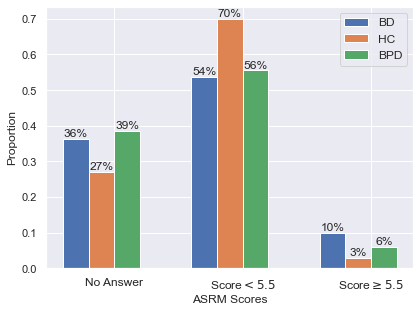

In [45]:
trun_plot(["No Answer", "Score$<5.5$","Score$\geq 5.5$"],altmantrun_class2,altmantrun_class1,altmantrun_class0,\
          'ASRM Scores',name=DATA_DIR+"/plots/ASRMtrun_barchart_proportion")

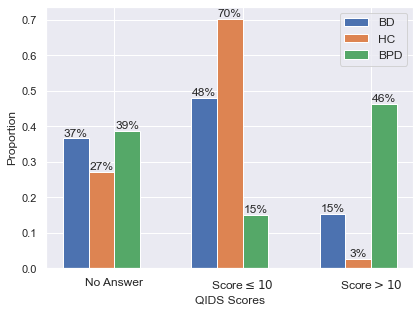

In [50]:
trun_plot(["No Answer", "Score$\leq 10$","Score$> 10$"],qidstrun_class2,qidstrun_class1,qidstrun_class0,\
          'QIDS Scores',name=DATA_DIR+"/plots/QIDStrun_barchart_proportion")

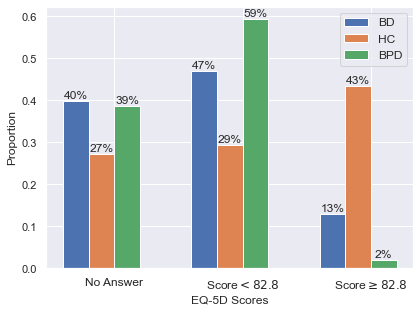

In [44]:
trun_plot(["No Answer", "Score$<82.8$","Score$\geq 82.8$"],eq5dtrun_class2,eq5dtrun_class1,eq5dtrun_class0,\
          'EQ-5D Scores',name=DATA_DIR+"/plots/EQ5Dtrun_barchart_proportion")

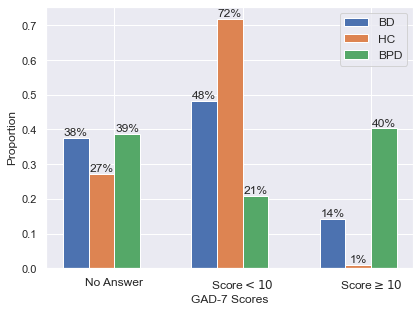

In [23]:
trun_plot(["No Answer", "Score$<10$","Score$\geq 10$"],gad7trun_class2,gad7trun_class1,gad7trun_class0,\
          'GAD-7 Scores',name=DATA_DIR+"/plots/GAD7trun_barchart_proportion")

In [24]:
def missing_proportions(collection, class_=0):

            collections1 =copy.deepcopy(collection)
        

            altman,qids,eq5d,gad7=[],[],[],[]
            
            for par in collections1:            

                if par.diagnosis==class_:
                    len_=len(par.data[0])
                    altman.append(len(np.where(par.data[0]<0)[0])/len_)
                    qids.append(len(np.where(par.data[1]<0)[0])/len_)
                    eq5d.append(len(np.where(par.data[2]<0)[0])/len_)
                    gad7.append(len(np.where(par.data[3]<0)[0])/len_)
            
            return np.array(altman),np.array(qids),np.array(eq5d),np.array(gad7)

In [25]:
BPD_missing=missing_proportions(weekly_data, class_=0)
HC_missing=missing_proportions(weekly_data, class_=1)
BD_missing=missing_proportions(weekly_data, class_=2)

In [125]:
def missing_proportions_pd(collection):
            
            groups=['BPD','HC','BD']
            types=['ASRM','QIDS','EQ-5D','GAD-7']
            collections1 =copy.deepcopy(collection)
    
            
            datas=[]
            
            for par in collections1:            

                    
                    len_=len(par.data[0])
                    for j in range(len(par.data)):
                        
                        datas.append([groups[par.diagnosis],types[j],len(np.where(par.data[j]<0)[0])/len_])

            
            return pd.DataFrame(datas, columns=['Diagnosis','Questionnaire type','Proportion of missing weeks per participant'])

In [126]:
missing_pd=missing_proportions_pd(weekly_data)

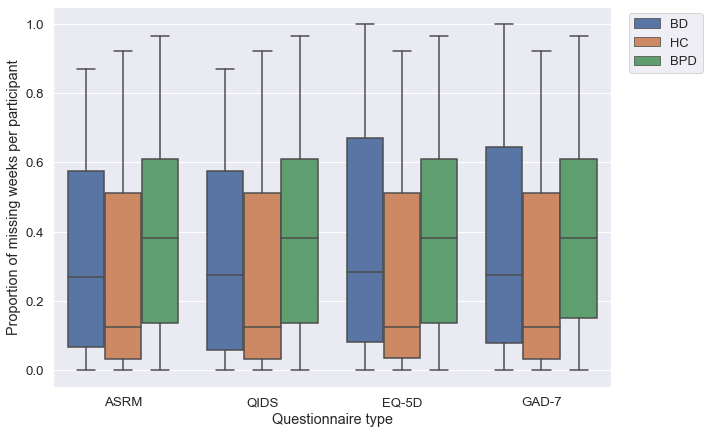

In [132]:


a4_dims = (10, 7)

fig, ax = plt.subplots(figsize=a4_dims)

sns.set(font_scale=1.2)
sns.boxplot(x="Questionnaire type", y='Proportion of missing weeks per participant',\
            hue="Diagnosis", data=missing_pd,ax=ax,hue_order=['BD','HC','BPD'])
fontsize=13
plt.legend(bbox_to_anchor=(1.02, 1),fontsize=fontsize)
plt.savefig(DATA_DIR+'plots/Missing_proportion.jpeg',dpi=300,bbox_inches='tight')

In [116]:
missing_pd

,Diagnosis,Type,Proportion
0,HC,ASRM,0.115385
1,HC,QIDS,0.115385
2,HC,EQ-5D,0.115385
3,HC,GAD-7,0.115385
4,HC,ASRM,0.528302
...,...,...,...
555,HC,GAD-7,0.730769
556,BPD,ASRM,0.928571
557,BPD,QIDS,0.928571
558,BPD,EQ-5D,0.928571
